In [52]:
import pandas as pd
import numpy as np
import nltk
import pymorphy3
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from mlxtend.preprocessing import TransactionEncoder
from wordcloud import WordCloud
df = pd.read_csv('./csvs/lab5.csv',encoding='cp1251')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       198 non-null    int64 
 1   gender   198 non-null    object
 2   age      198 non-null    int64 
 3   income   198 non-null    int64 
 4   product  198 non-null    object
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [53]:
ids = df['id'].unique()
print("кол-во id",len(ids))
products = df['product'].unique()
print("кол-во продуктов",len(products))


кол-во id 198
кол-во продуктов 10


In [54]:
ids_products = [[el for el in df[df['id'] == id]['product']] for id in ids]
print(ids_products)

[['cigarettes '], ['a milk'], ['chocolate '], ['a milk'], ['bread'], ['bread'], ['a milk'], ['water '], ['water '], ['bread'], ['water '], ['water '], ['chocolate '], ['a milk'], ['water '], ['oil '], ['chocolate '], ['oil '], ['chocolate '], ['chocolate '], ['cigarettes'], ['flakes '], ['cigarettes'], ['tangerines'], ['tangerines '], ['cigarettes'], ['tangerines'], ['cigarettes'], ['water '], ['flakes '], ['tangerines '], ['cigarettes '], ['cigarettes '], ['a milk'], ['chocolate '], ['a milk'], ['bread'], ['bread'], ['a milk'], ['water '], ['water '], ['bread'], ['water '], ['water '], ['chocolate '], ['a milk'], ['water '], ['oil '], ['chocolate '], ['oil '], ['chocolate '], ['chocolate '], ['cigarettes'], ['flakes '], ['cigarettes'], ['tangerines'], ['tangerines '], ['cigarettes'], ['tangerines'], ['cigarettes'], ['water '], ['flakes '], ['tangerines '], ['cigarettes '], ['cigarettes '], ['a milk'], ['chocolate '], ['a milk'], ['bread'], ['bread'], ['a milk'], ['water '], ['water ']

In [55]:
te = TransactionEncoder()
te_allp = te.fit_transform(ids_products)
df = pd.DataFrame(te_allp, columns=te.columns_)
df.head()

,a milk,bread,chocolate,cigarettes,cigarettes,flakes,oil,tangerines,tangerines,water
0,False,False,False,False,True,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False


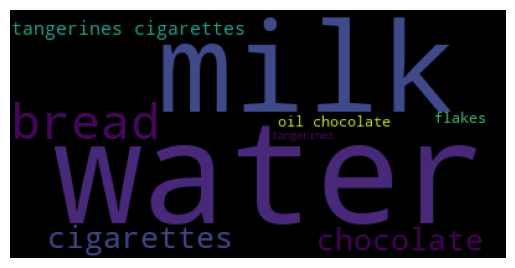

In [56]:
df = pd.read_csv('./csvs/lab5.csv',encoding='cp1251')
text = " ".join(df['product'])
cloud = WordCloud().generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.show()

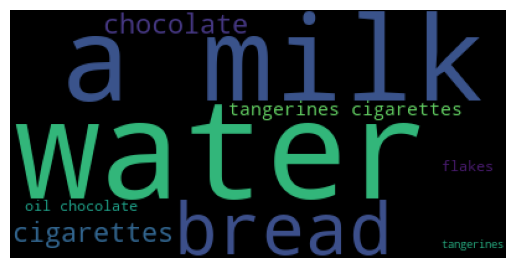

Убраны русские стоп-слова


In [57]:
stop_words = stopwords.words('russian')
df = pd.read_csv('./csvs/lab5.csv',encoding='cp1251')
text = " ".join(df['product'])
cloud = WordCloud().generate(text)
cloud = WordCloud(stopwords=stop_words).generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.show()
print("Убраны русские стоп-слова")

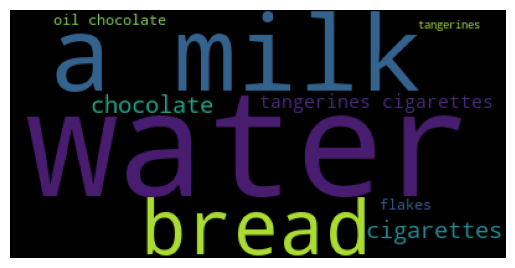

In [58]:
stop_words = stopwords.words('russian')
df = pd.read_csv('./csvs/lab5.csv',encoding='cp1251')

text = " ".join(df['product'])
text = word_tokenize(text)
morph = pymorphy3.MorphAnalyzer()

def lemmatize_text(tokens):
    text_new=''
    for word in tokens:
        word = morph.parse(word)[0]
        text_new = text_new + ' ' + word.normal_form
    return text_new

text = lemmatize_text(text)
cloud = WordCloud(stopwords=stop_words).generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.show()


#### Задание

1. Загрузить пред обработанные данные, вывести первые 5 строк из 
датасета;


In [59]:
from datasets import load_dataset

dataset = load_dataset("RussianNLP/tape")
dataset.head(5)

ValueError: Config name is missing.
Please pick one among the available configs: ['chegeka.episodes', 'chegeka.raw', 'multiq.episodes', 'multiq.raw', 'per_ethics.episodes', 'per_ethics.raw', 'ru_openbook.episodes', 'ru_openbook.raw', 'ru_worldtree.episodes', 'ru_worldtree.raw', 'sit_ethics.episodes', 'sit_ethics.raw', 'winograd.episodes', 'winograd.raw']
Example of usage:
	`load_dataset('tape', 'chegeka.episodes')`

2. Вывести уникальное количество выбранных колонок;


3. Сформировать новый датасет из нужных столбцов;


4. Построить облако слов на основе серых данных;


5. Почистить стоп слова и найти леммы, построить новое облако слов;


6. Описать полученный результат.